<a href="https://colab.research.google.com/github/myatsupaing-mint/GenAI/blob/main/GenAI_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

In [1]:
from datasets import load_dataset
ds = load_dataset("cornell-movie-review-data/rotten_tomatoes" , split = "train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [2]:
ds

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [4]:
from datasets import get_dataset_split_names

get_dataset_split_names("cornell-movie-review-data/rotten_tomatoes")

['train', 'validation', 'test']

In [5]:
ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [6]:
ds[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [8]:
emotion_ds = load_dataset("dair-ai/emotion")

In [9]:
split_db = emotion_ds['train'].train_test_split(test_size=0.2)
split_db

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12800
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3200
    })
})

In [10]:
emotion_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
import pandas as pd

In [12]:
df_emo_train =emotion_ds['train'].to_pandas()
df_emo_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<Axes: xlabel='label'>

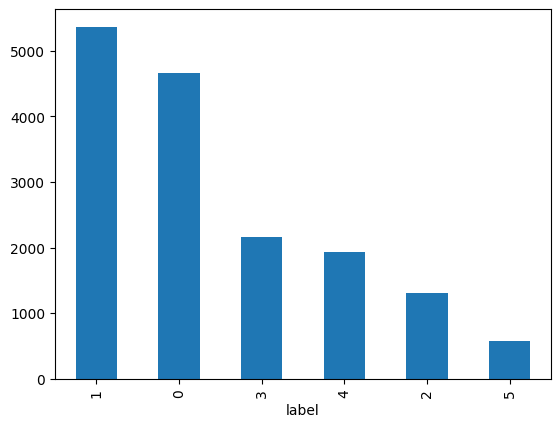

In [19]:
 df_emo_train['label'].value_counts().plot(kind='bar')

In [21]:
split_db['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [29]:
career_related = df_emo_train[df_emo_train['text'].str.contains(r'\b(job|work|career)\b',case = False, na = False)]

/tmp/ipython-input-29-964188118.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  career_related = df_emo_train[df_emo_train['text'].str.contains(r'\b(job|work|career)\b',case = False, na = False)]


In [33]:
emotion_ds['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [41]:
df_emo_train['text'].apply(lambda x: len(x.split())).max()

66

In [50]:
#pandas to parqet
from datasets import Dataset
career_related_parq = Dataset.from_pandas(career_related)
career_related_parq

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 406
})

In [52]:
career_related_parq.filter(lambda x:x['label']==1)

Filter:   0%|          | 0/406 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 154
})